# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)
#study_results_df
# Combine the data into a single DataFrame
mouse_study_df = pd.merge(mouse_metadata_df, study_results_df,how="left", on=["Mouse ID", "Mouse ID"])
mouse_study_df.head()
# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_count = mouse_study_df["Mouse ID"].nunique()
mouse_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_df = mouse_study_df.loc[mouse_study_df.duplicated(["Mouse ID", "Timepoint"], keep = False) == True]
 # Print the resultant Dataframe
#duplicate_df = mouse_study_df[(["Mouse ID", "Timepoint"])]
duplicate_df["Mouse ID"].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study_df = mouse_study_df.drop_duplicates(["Mouse ID", "Timepoint"], keep = False, ignore_index = True)
clean_mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1878,z969,Naftisol,Male,9,30,25,63.145652,2
1879,z969,Naftisol,Male,9,30,30,65.841013,3
1880,z969,Naftisol,Male,9,30,35,69.176246,4
1881,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_mouse_study_df)


1883

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
cleaned_grouped_df = clean_mouse_study_df.groupby("Drug Regimen")
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
grouped_mean = cleaned_grouped_df.mean()
grouped_median = cleaned_grouped_df.median()
grouped_variance = cleaned_grouped_df.var()
grouped_stddev = cleaned_grouped_df.std()
grouped_sem = cleaned_grouped_df.sem()
# Assemble the resulting series into a single summary DataFrame.
summary_stats_df = pd.DataFrame({'Mean': grouped_mean['Tumor Volume (mm3)'],
                                 'Median': grouped_median['Tumor Volume (mm3)'],
                                 'Var': grouped_variance['Tumor Volume (mm3)'],
                                 'Std': grouped_stddev['Tumor Volume (mm3)'],
                                 'SEM': grouped_sem['Tumor Volume (mm3)']
                                })
summary_stats_df


C:\Users\Karen Leswing\AppData\Local\Temp\ipykernel_24096\1728785436.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_mean = cleaned_grouped_df.mean()
C:\Users\Karen Leswing\AppData\Local\Temp\ipykernel_24096\1728785436.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_median = cleaned_grouped_df.median()
C:\Users\Karen Leswing\AppData\Local\Temp\ipykernel_24096\1728785436.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should 

,Mean,Median,Var,Std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
cleaned_grouped_df["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"], axis=1)


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: >

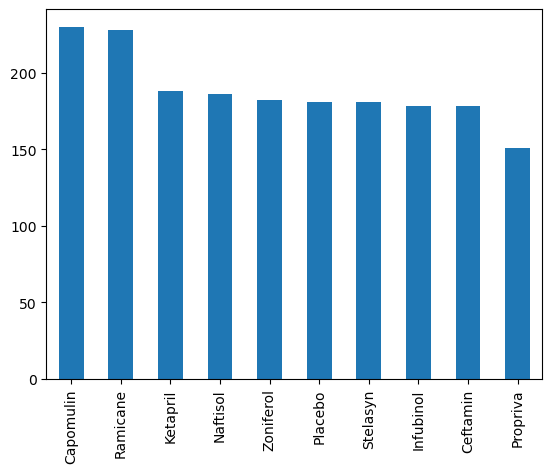

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

clean_mouse_study_df["Drug Regimen"].value_counts().plot(kind='bar')


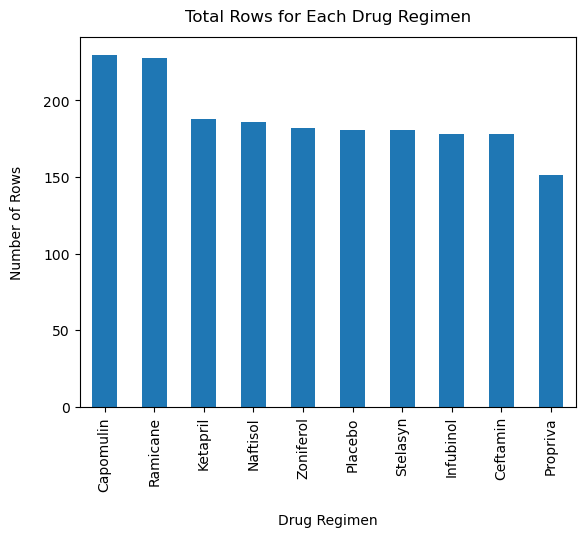

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Plot a bar chart
clean_mouse_study_df["Drug Regimen"].value_counts().plot(kind='bar');
plt.xlabel("Drug Regimen", labelpad=16)
plt.ylabel("Number of Rows", labelpad=14)
plt.title("Total Rows for Each Drug Regimen", y=1.02);






<Axes: ylabel='Sex'>

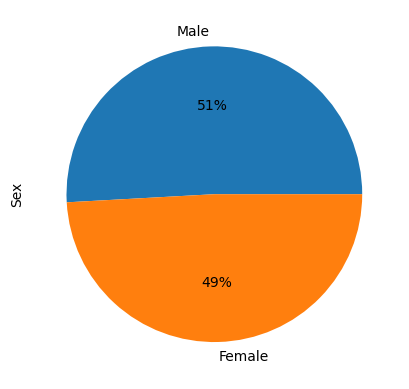

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_gender_pie_df = clean_mouse_study_df["Sex"].value_counts()
mouse_gender_pie_df.plot(kind= 'pie', autopct='%1.0f%%')


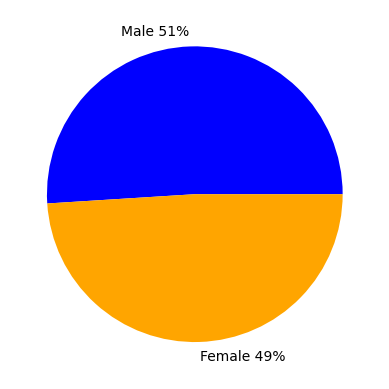

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#clean_mouse_study_df["Sex"].value_counts().plot(kind='pie')
labels = ["Male 51%", "Female 49%"]
#sizes = clean_mouse_study_df["Sex"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
#print(sizes)
sizes = [51, 49]

colors = ["blue", "orange"]
plt.pie(sizes, labels=labels, colors=colors,)

plt.show() 
#fig, ax = plt.subplots()
#ax.pie(sizes, labels=labels, autopct='%1.1f%%')

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
for regimen in regimens:
    print (regimen)
    regimen_df = clean_mouse_study_df.loc[clean_mouse_study_df["Drug Regimen"] == regimen]
    #print (regimen_df)


# Start by getting the last (greatest) timepoint for each mouse

    mouse_list = regimen_df["Mouse ID"].unique()
    print (mouse_list)
    
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
    for mouse in mouse_list:
         mouse_df = regimen_df.loc[regimen_df["Mouse ID"] == mouse]
         mouse_df = mouse_df.tail(1)
         print(mouse_df)
        

Capomulin
['s185' 'x401' 'm601' 'f966' 'u364' 'y793' 'r554' 'm957' 't565' 'i738'
 'w914' 'g288' 'l897' 'b742' 'b128' 'j246' 'j119' 'w150' 'v923' 'g316'
 's710' 'l509' 'r944' 'i557' 'r157']
   Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
19     s185    Capomulin  Female           3          17         45   

    Tumor Volume (mm3)  Metastatic Sites  
19           23.343598                 1  
   Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
29     x401    Capomulin  Female          16          15         45   

    Tumor Volume (mm3)  Metastatic Sites  
29           28.484033                 0  
   Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
39     m601    Capomulin  Male          22          17         45   

    Tumor Volume (mm3)  Metastatic Sites  
39           28.430964                 1  
   Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
64     f966    Capomulin  Male          16          17     

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
1733     x226     Ceftamin  Male          23          28          0   

      Tumor Volume (mm3)  Metastatic Sites  
1733                45.0                 0  
     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
1763     x581     Ceftamin  Female          19          28         45   

      Tumor Volume (mm3)  Metastatic Sites  
1763           64.634949                 3  
     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
1787     x822     Ceftamin  Male           3          29         45   

      Tumor Volume (mm3)  Metastatic Sites  
1787            61.38666                 3  
     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
1835     y769     Ceftamin  Female           6          27         45   

      Tumor Volume (mm3)  Metastatic Sites  
1835           68.594745                 4  
     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Ti

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin", "Ketapril", "Naftisol", "Zoniferol", "Placebo", "Stelasyn",
             "Propriva"]
for treatment in treatments:
  #print(treatment)
  treatment = clean_mouse_study_df.loc[clean_mouse_study_df["Drug Regimen"] == treatment]
  #print(treatment)
 # Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
clean_mouse_study_df.tail()
         
    
    # Determine outliers using upper and lower bounds


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1878,z969,Naftisol,Male,9,30,25,63.145652,2
1879,z969,Naftisol,Male,9,30,30,65.841013,3
1880,z969,Naftisol,Male,9,30,35,69.176246,4
1881,z969,Naftisol,Male,9,30,40,70.314904,4
1882,z969,Naftisol,Male,9,30,45,73.867845,4


In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.




## Line and Scatter Plots

KeyError: 'Tumor Volume (mm3)'

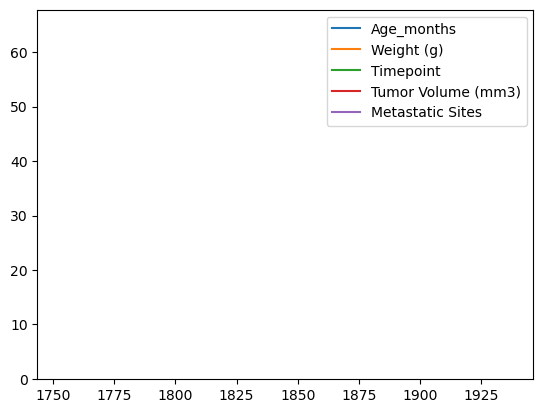

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_df.plot(label="Tumor Volume per Timepoint")
mouse_df.loc["Tumor Volume (mm3)", "0":"45"].plot(label="Tumor Volume")
plt.legend()
plt.show()

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen



## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
